# Interpretando o modelo


Epoch 1/15
160/160 [==============================] - 11s 65ms/step - loss: 1.6952 - accuracy: 0.3990 - val_loss: 1.4171 - val_accuracy: 0.5121
Epoch 2/15
160/160 [==============================] - 10s 62ms/step - loss: 1.3285 - accuracy: 0.5365 - val_loss: 1.2623 - val_accuracy: 0.5636
Epoch 3/15
160/160 [==============================] - 10s 63ms/step - loss: 1.2012 - accuracy: 0.5820 - val_loss: 1.1991 - val_accuracy: 0.5871
Epoch 4/15
160/160 [==============================] - 10s 63ms/step - loss: 1.1319 - accuracy: 0.6085 - val_loss: 1.1489 - val_accuracy: 0.6042
Epoch 5/15
160/160 [==============================] - 10s 63ms/step - loss: 1.0741 - accuracy: 0.6250 - val_loss: 1.1048 - val_accuracy: 0.6198
Epoch 6/15
160/160 [==============================] - 10s 63ms/step - loss: 1.0261 - accuracy: 0.6447 - val_loss: 1.0834 - val_accuracy: 0.6259
Epoch 7/15
160/160 [==============================] - 10s 63ms/step - loss: 0.9916 - accuracy: 0.6545 - val_loss: 1.0859 - val_accuracy:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 119   78  -15]
  [ 127   81  -18]
  [-124   83  -19]
  ...
  [  55   59   -1]
  [  72   59   -1]
  [ 100   67  -14]]

 [[ 117   78  -14]
  [ 125   81  -17]
  [-123   84  -18]
  ...
  [  56   59   -1]
  [  79   62   -1]
  [ 110   76   -7]]

 [[-124   88  -10]
  [-119   84  -12]
  [-119   85  -18]
  ...
  [  74   59   -1]
  [  88   67   -1]
  [ 125   80   -2]]

 ...

 [[-120   75  -29]
  [-122   75  -29]
  [-125   81  -22]
  ...
  [  78   81   -1]
  [  91   78   -4]
  [  99   73  -10]]

 [[-127   76  -26]
  [-128   78  -28]
  [ 127   82  -26]
  ...
  [  52   72   -1]
  [  66   67   -1]
  [  76   61   -7]]

 [[ 117   73  -27]
  [ 119   75  -26]
  [ 124   78  -27]
  ...
  [  50   70   -1]
  [  59   67   -1]
  [  75   61   -6]]]


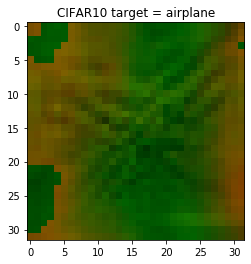

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


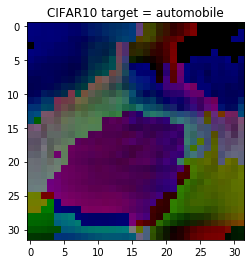

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


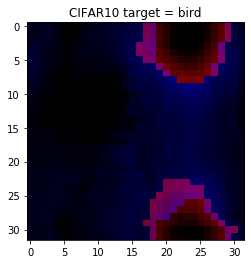

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


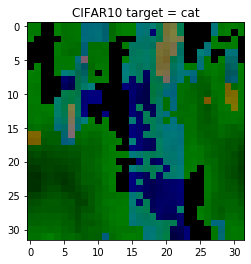

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


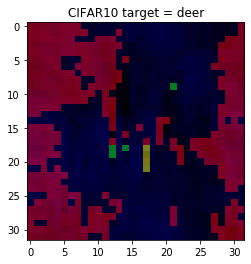

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


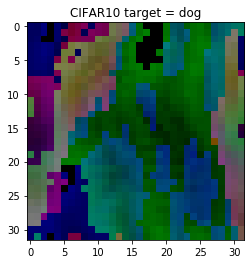

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


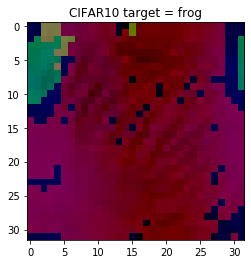

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


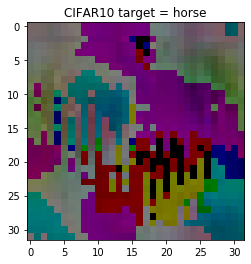

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


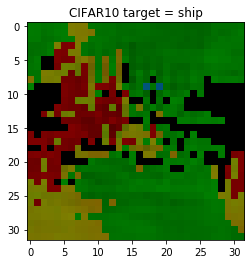

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


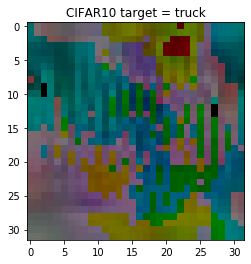

In [1]:
import tensorflow
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import activations
import numpy as np

# Model configuration
img_width, img_height = 32, 32
batch_size = 250
no_epochs = 15
no_classes = 10
validation_split = 0.2
verbosity = 1

# Load CIFAR-10 dataset
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Reshape data
input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 3)
input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 3)
input_shape = (img_width, img_height, 3)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Convert them into black or white: [0, 1].
input_train = input_train / 255
input_test = input_test / 255

# Convert target vectors to categorical targets
target_train = tensorflow.keras.utils.to_categorical(target_train, no_classes)
target_test = tensorflow.keras.utils.to_categorical(target_test, no_classes)

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax', name='visualized_layer'))

# Compile the model
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit data to model
model.fit(input_train, target_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# =============================================
# Activation Maximization code
# =============================================
from tf_keras_vis.activation_maximization import ActivationMaximization
import matplotlib.pyplot as plt

def loss(output):
  return (output[0, 0], output[1, 1], output[2, 2], output[3, 3], output[4, 4], output[5, 5], output[6, 6], output[7, 7], output[8, 8], output[9, 9])

def model_modifier(m):
    m.layers[-1].activation = tensorflow.keras.activations.linear

# Initialize Activation Maximization
visualize_activation = ActivationMaximization(model, model_modifier)

# Generate a random seed for each activation
seed_input = tensorflow.random.uniform((10, 32, 32, 3), 0, 255)

# Generate activations and convert into images
activations = visualize_activation(loss, seed_input=seed_input, steps=512, input_range= (30,150))
images = [activation.astype(np.float32) for activation in activations]

# Define classes
classes = {
  0: 'airplane',
  1: 'automobile',
  2: 'bird',
  3: 'cat',
  4: 'deer',
  5: 'dog',
  6: 'frog',
  7: 'horse',
  8: 'ship',
  9: 'truck'
}

# Visualize each image
for i in range(0, len(images)):
  visualization = images[i]
  plt.imshow(visualization, cmap='gray')
  plt.title(f'CIFAR10 target = {classes[i]}')
  plt.show()